In [1]:
from prep import *
from trainhelper import *
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


## Load nltk library

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

## Load raw data and clean it

In [7]:
LOAD = False # If false, computer from ground
if not LOAD:
    root_path = "data/train"
    data_raw_tr = load_data(root_path)
    data_clean_tr = clean_data(data_raw_tr, filter_size=100)

    root_path = "data/test"
    data_raw_te = load_data(root_path)
    data_clean_te = clean_data(data_raw_te, filter_size=100)

    pickle.dump(data_clean_tr, open("data_clean_tr.pkl", 'wb'))
    pickle.dump(data_clean_te, open("data_clean_te.pkl", 'wb'))
    pickle.dump(data_raw_tr, open("data_raw_tr.pkl", 'wb'))
    pickle.dump(data_raw_te, open("data_raw_te.pkl", 'wb'))
    
else:
    with open("data_clean_tr.pkl", 'rb') as f:
        data_clean_tr = pickle.load(f)
    with open("data_clean_te.pkl", 'rb') as f:
        data_clean_te = pickle.load(f)
    with open("data_raw_tr.pkl", 'rb') as f:
        data_raw_tr = pickle.load(f)
    with open("data_raw_te.pkl", 'rb') as f:
        data_raw_te = pickle.load(f)

## Raw data analysis

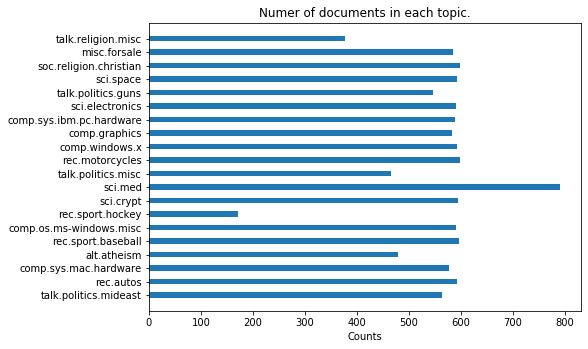

Maxiumn and minimum document length counted by charactors:  72637 125
Number of unique document length:  11083


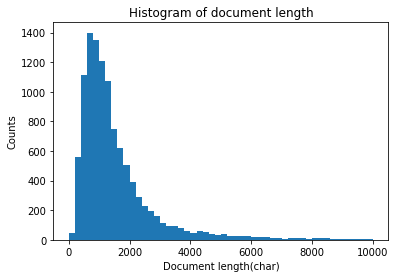

Maximum document length(word):  5318


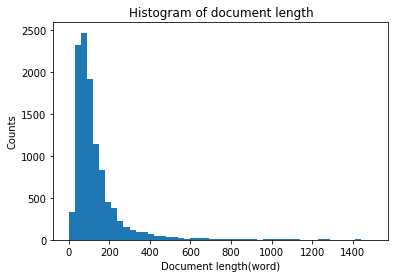

In [8]:
analyze_data(data_raw_tr, data_clean_tr)


## Create training and testing data(prep module)

In [12]:
max_feature = 2000
mid_df = 10
print("Get trainning data.")
X_train, Y_train, feature_name,idf = get_feature(data_clean_tr, min_df=mid_df, max_feature=max_feature, 
                                                 norm_by_doclen=False)
print("Get testing data.")
X_test, Y_test, _, _ = get_feature(data_clean_te, feat_select=feature_name, feat_idf=idf,
                                        min_df=mid_df, max_feature=max_feature, norm_by_doclen=False)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

Get trainning data.
Total number of features:  75223
Total number of documents:  11050
Get testing data.
Total number of features:  61416
Total number of documents:  7748


((11050, 2000), (11050,), (7748, 2000), (7748,), 2000)

## Logistic regression(trainhelper module)

In [32]:
# (topX feature) 
topX = [[1000,0.6809,0.6790,0.6787,0.6739],
[2000,0.7513,0.7426,0.7450,0.7404],
[5000,0.8006,0.7883,0.7933,0.7884],
[10000,0.8144,0.8043,0.8080,0.8037]]

intopic = [[1000,0.7501,0.7374,0.7370,0.7345],
[2000,0.7891,0.7751,0.7773,0.7740],
[5000,0.8103,0.7979,0.8015,0.7974],
[10000,0.8205,0.8095,0.8125,0.8086]]
# (feature in topics)
results = [[1000,0.7501,0.7374,0.7370,0.7345],
[2000,0.7891,0.7751,0.7773,0.7740],
[3000,0.8023,0.7886,0.7920,0.7880],
[4000,0.8095,0.7972,0.8007,0.7966],
[5000,0.8103,0.7979,0.8015,0.7974],
[6000,0.8125,0.8000,0.8042,0.7999],
[10000,0.8205,0.8095,0.8125,0.8086],
[18571,0.8272,0.8164,0.8197,0.8157]]

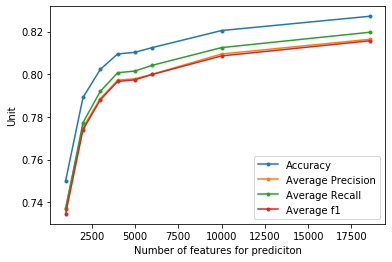

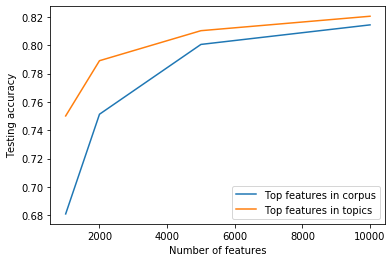

In [35]:
def plot_results(results, topX, intopic):
    results = np.array(results)
    topX = np.array(topX)
    intopic = np.array(intopic)
    col = results.shape[1]
    n_feat = results[:, 0]
    names = ["Feature number", "Accuracy", "Average Precision", "Average Recall", "Average f1"]
    
    plt.figure(0)
    for i in range(1, col):
        plt.plot(n_feat, results[:, i], marker='.',label=names[i])
    
    plt.legend()
    plt.xlabel("Number of features for prediciton")
    plt.ylabel("Unit")
    plt.show()
    
    plt.figure(1)
    plt.plot(topX[:, 0], topX[:, 1], label="Top features in corpus")
    plt.plot(intopic[:, 0], intopic[:, 1], label="Top features in topics")
    plt.legend()
    plt.xlabel("Number of features")
    plt.ylabel("Testing accuracy")
    plt.show()
    
plot_results(results, topX, intopic)

In [13]:
param_grid = {'C': [2], #[0.1, 1., 2, 5, 10]
               'multi_class': ['auto'],
               'solver': ['lbfgs'], # 'newton-cg', 'sag', 'saga', 'lbfgs'
               'class_weight': ['balanced'],
               'penalty': ['l2'],
               'max_iter': [200]}
clf = LogisticRegression()

clf_best, acc_best = cross_validate(X_train, Y_train, clf, param_grid, n_folds=5, verb=True)

Total number of fits:  1
Current parameter setting: 
{'C': 2, 'multi_class': 'auto', 'solver': 'lbfgs', 'class_weight': 'balanced', 'penalty': 'l2', 'max_iter': 200}
No.1 fold's accuracy: 0.868778
No.2 fold's accuracy: 0.860181
No.3 fold's accuracy: 0.876018
No.4 fold's accuracy: 0.856561
No.5 fold's accuracy: 0.852036


Overall accuracy: 0.7891

Class	Precision	Recall		f1	tp	fp	tn	fn
0	0.9532		0.7641		0.8482	285	14	7361	88
1	0.8743		0.8456		0.8597	334	48	7305	61
2	0.7848		0.8073		0.7959	310	85	7279	74
3	0.6603		0.6458		0.6529	206	106	7323	113
4	0.8322		0.9118		0.8702	362	73	7278	35
5	0.7318		0.7132		0.7224	281	103	7251	113
6	0.9816		0.9019		0.9401	745	14	6908	81
7	0.9339		0.8561		0.8933	339	24	7328	57
8	0.6962		0.9141		0.7904	181	79	7471	17
9	0.6277		0.5566		0.5901	172	102	7337	137
10	0.9467		0.8920		0.9185	355	20	7330	43
11	0.8011		0.7379		0.7682	290	72	7283	103
12	0.6706		0.7455		0.7060	287	141	7222	98
13	0.6481		0.7143		0.6796	280	152	7204	112
14	0.6683		0.6972		0.6824	274	136	7219	119
15	0.7009		0.8242		0.7576	300	128	7256	64
16	0.9115		0.8629		0.8866	340	33	7321	54
17	0.7667		0.8090		0.7873	322	98	7252	76
18	0.8051		0.8154		0.8102	318	77	7281	72
19	0.5076		0.5320		0.5195	133	129	7369	117

avg	0.7751		0.7773		0.7740



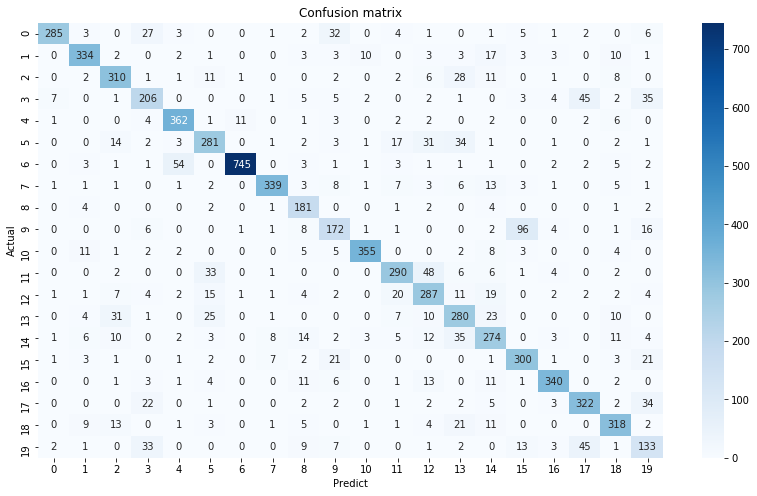

In [14]:
get_result(X_test, Y_test, clf_best, save_path=None, verb=True)

## Random Forest

In [17]:
param_grid = {'n_estimators': [800],
               'max_features': ['auto'],
               'max_depth': [40],
               'min_samples_split': [4],
#                'min_samples_leaf': [1],
               'bootstrap': [True]}

clf = RandomForestClassifier()

clf_best, acc_best = cross_validate(X_train, Y_train, clf, param_grid, n_folds=5, verb=True)

Total number of fits:  1
Current parameter setting: 
{'n_estimators': 800, 'max_features': 'auto', 'max_depth': 40, 'min_samples_split': 4, 'bootstrap': True}
No.1 fold's accuracy: 0.770136
No.2 fold's accuracy: 0.776923
No.3 fold's accuracy: 0.752489
No.4 fold's accuracy: 0.749321
No.5 fold's accuracy: 0.763348


Overall accuracy: 0.6702

Class	Precision	Recall		f1	tp	fp	tn	fn
0	0.9379		0.7292		0.8205	272	18	7357	101
1	0.8367		0.7266		0.7778	287	56	7297	108
2	0.7609		0.6797		0.7180	261	82	7282	123
3	0.6911		0.5329		0.6018	170	76	7353	149
4	0.4540		0.8816		0.5993	350	421	6930	47
5	0.6267		0.7157		0.6682	282	168	7186	112
6	0.9916		0.4310		0.6008	356	3	6919	470
7	0.8640		0.8662		0.8651	343	54	7298	53
8	0.3141		0.8788		0.4628	174	380	7170	24
9	0.6406		0.4498		0.5285	139	78	7361	170
10	0.8766		0.8392		0.8575	334	47	7303	64
11	0.8321		0.5802		0.6837	228	46	7309	165
12	0.6567		0.6260		0.6410	241	126	7237	144
13	0.6486		0.6122		0.6299	240	130	7226	152
14	0.3896		0.5344		0.4506	210	329	7026	183
15	0.6258		0.8132		0.7073	296	177	7207	68
16	0.7974		0.7792		0.7882	307	78	7276	87
17	0.6538		0.8492		0.7388	338	179	7171	60
18	0.7903		0.7923		0.7913	309	82	7276	81
19	0.6914		0.2240		0.3384	56	25	7473	194

avg	0.7040		0.6771		0.6635



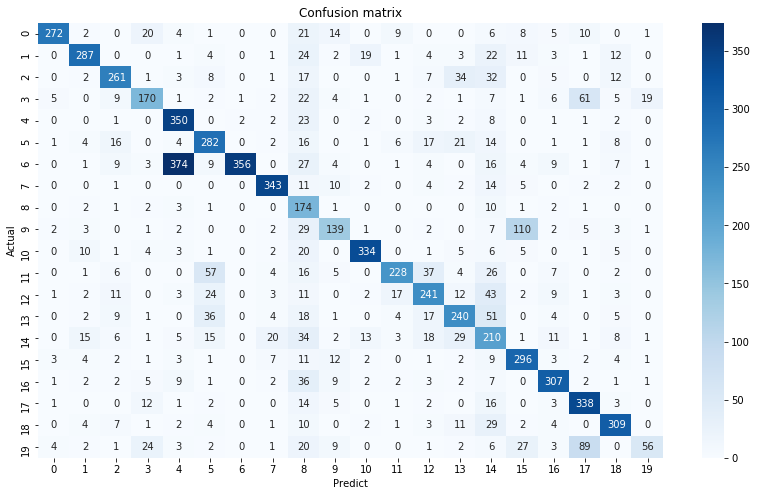

In [18]:
get_result(X_test, Y_test, clf_best, save_path=None, verb=True)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
param_grid = {'alpha': [0.01, 0.1, 1],
              'fit_prior': [True, False]}
clf = MultinomialNB()
clf_best, acc_best = cross_validate(X_train, Y_train, clf, param_grid, n_folds=5, verb=True)

Total number of fits:  6
Current parameter setting: 
{'alpha': 0.01, 'fit_prior': True}
No.1 fold's accuracy: 0.863348
No.2 fold's accuracy: 0.867421
No.3 fold's accuracy: 0.844344
No.4 fold's accuracy: 0.857014
No.5 fold's accuracy: 0.844344
Current parameter setting: 
{'alpha': 0.01, 'fit_prior': False}
No.1 fold's accuracy: 0.863348
No.2 fold's accuracy: 0.868326
No.3 fold's accuracy: 0.849321
No.4 fold's accuracy: 0.855204
No.5 fold's accuracy: 0.844796
Current parameter setting: 
{'alpha': 0.1, 'fit_prior': True}
No.1 fold's accuracy: 0.860633
No.2 fold's accuracy: 0.864253
No.3 fold's accuracy: 0.841176
No.4 fold's accuracy: 0.857919
No.5 fold's accuracy: 0.847059
Current parameter setting: 
{'alpha': 0.1, 'fit_prior': False}
No.1 fold's accuracy: 0.861538
No.2 fold's accuracy: 0.866063
No.3 fold's accuracy: 0.842534
No.4 fold's accuracy: 0.858824
No.5 fold's accuracy: 0.844344
Current parameter setting: 
{'alpha': 1, 'fit_prior': True}
No.1 fold's accuracy: 0.841176
No.2 fold's 

Overall accuracy: 0.7730

Class	Precision	Recall		f1	tp	fp	tn	fn
0	0.9348		0.8070		0.8662	301	21	7354	72
1	0.8692		0.8582		0.8637	339	51	7302	56
2	0.7632		0.7891		0.7759	303	94	7270	81
3	0.6871		0.6332		0.6591	202	92	7337	117
4	0.6782		0.9395		0.7878	373	177	7174	24
5	0.6746		0.7208		0.6969	284	137	7217	110
6	0.9937		0.7663		0.8653	633	4	6918	193
7	0.9156		0.8763		0.8955	347	32	7320	49
8	0.7202		0.8838		0.7937	175	68	7482	23
9	0.6818		0.5340		0.5989	165	77	7362	144
10	0.8902		0.9171		0.9035	365	45	7305	33
11	0.7951		0.7506		0.7723	295	76	7279	98
12	0.6281		0.7325		0.6763	282	167	7196	103
13	0.6627		0.7168		0.6887	281	143	7213	111
14	0.7378		0.6158		0.6713	242	86	7269	151
15	0.6500		0.8929		0.7523	325	175	7209	39
16	0.9103		0.8503		0.8793	335	33	7321	59
17	0.6875		0.8844		0.7736	352	160	7190	46
18	0.8366		0.7744		0.8043	302	59	7299	88
19	0.5867		0.3520		0.4400	88	62	7436	162

avg	0.7652		0.7647		0.7582



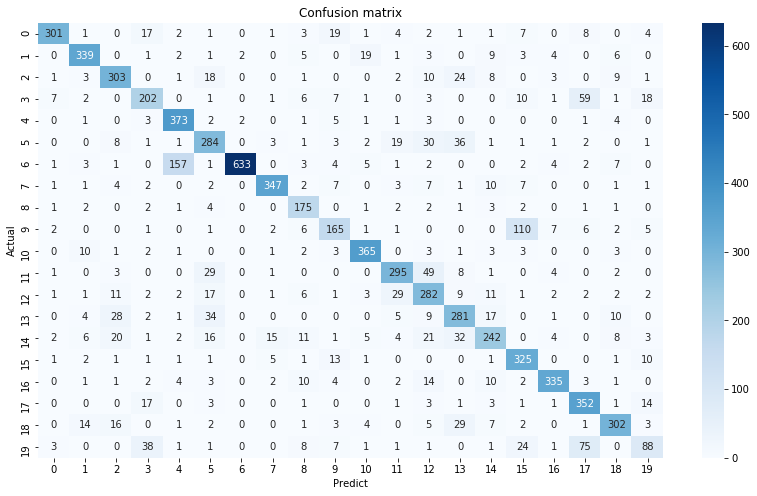

In [16]:
get_result(X_test, Y_test, clf_best, save_path=None, verb=True)